In [84]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [161]:
def create_bandit_setup(N=10):
    # create N arms from a set distribution
    arm_means = np.ones(shape=N)
    arm_counts = np.zeros(shape=N)
    arm_estimates = np.zeros(shape=N)
    return arm_means, arm_counts, arm_estimates

def draw_reward(action, arm_means, arm_counts):
    selected_mean = arm_means[action]
    reward = np.random.normal(loc=selected_mean)
    arm_counts[action] = arm_counts[action] + 1
    # add random walk element
    arm_means = arm_means + np.random.normal(scale=0.01, size=(arm_means.size))
    return reward, arm_means, arm_counts

def update_sample_average(action, reward, arm_counts, arm_estimates):
    arm_estimates[action] = arm_estimates[action] + (1.0/arm_counts[action]) * (reward - arm_estimates[action])
    return arm_estimates

def update_const_step(action, reward, arm_counts, arm_estimates, step_size=0.1):
    arm_estimates[action] = arm_estimates[action] + (step_size) * (reward - arm_estimates[action])
    return arm_estimates

def eps_greedy_action(arm_means, arm_estimates, eps=0.1):
    opt_action = np.argmax(arm_means)
    if np.random.binomial(1, eps) == 1:
        rand_action = np.random.randint(low=0, high=arm_estimates.size)
        return rand_action, rand_action == opt_action
    else:
        action = np.argmax(arm_estimates)
        return action, action == opt_action

In [162]:
N_steps = 10000
N_runs = 100

sample_average_average_rewards = np.zeros(shape=(N_runs, N_steps))
sample_average_optimal_action_selected = np.zeros(shape=(N_runs, N_steps))

for exp_indx in range(N_runs):
    arm_means, arm_counts, arm_estimates = create_bandit_setup()
    for t in range(N_steps):
        action, is_optimal = eps_greedy_action(arm_means, arm_estimates)
        sample_average_optimal_action_selected[exp_indx, t] = is_optimal
        reward, arm_means, arm_counts = draw_reward(action, arm_means, arm_counts)
        arm_estimates = update_sample_average(action, reward, arm_counts, arm_estimates)
        
        if t == 0:
            sample_average_average_rewards[exp_indx, t] = reward
        else:
            # increment sample average formula
            sample_average_average_rewards[exp_indx, t] = sample_average_average_rewards[exp_indx, t-1] + (1.0/t) \
                                                            * (reward - sample_average_average_rewards[exp_indx, t-1])            
# not great code practice, but this is a small exercise. Lets just copy and paste for the other one!

step_average_rewards = np.zeros(shape=(N_runs, N_steps))
step_optimal_action_selected = np.zeros(shape=(N_runs, N_steps))

for exp_indx in range(N_runs):
    arm_means, arm_counts, arm_estimates = create_bandit_setup()
    for t in range(N_steps):
        action, is_optimal = eps_greedy_action(arm_means, arm_estimates)
        step_optimal_action_selected[exp_indx, t] = is_optimal
        reward, arm_means, arm_counts = draw_reward(action, arm_means, arm_counts)
        arm_estimates = update_const_step(action, reward, arm_counts, arm_estimates)
        if t == 0:
            step_average_rewards[exp_indx, t] = reward
        else:
            # increment sample average formula
            step_average_rewards[exp_indx, t] = step_average_rewards[exp_indx, t-1] + (1.0/t) \
                                                            * (reward - step_average_rewards[exp_indx, t-1])    

In [163]:
sample_average_mean_reward = np.mean(sample_average_average_rewards, axis=0)
sample_average_std_reward = np.std(sample_average_average_rewards, axis=0)
sample_average_mean_opt = np.mean(sample_average_optimal_action_selected, axis=0)
sample_average_std_opt = np.std(sample_average_optimal_action_selected, axis=0)

step_mean_reward = np.mean(step_average_rewards, axis=0)
step_std_reward = np.std(step_average_rewards, axis=0)
step_mean_opt = np.mean(step_optimal_action_selected, axis=0)
step_std_opt = np.std(step_optimal_action_selected, axis=0)

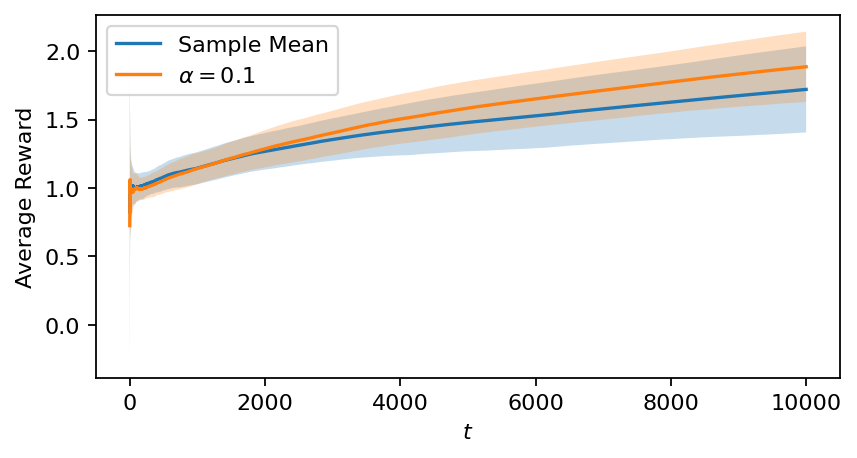

In [166]:
plt.figure(figsize=(6, 3), dpi=160)
plt.plot(sample_average_mean_reward, label="Sample Mean")
plt.fill_between(np.arange(N_steps), sample_average_mean_reward - sample_average_std_reward, 
                  sample_average_mean_reward + sample_average_std_reward, alpha=0.25)
plt.plot(step_mean_reward, label=r"$\alpha=0.1$")
plt.fill_between(np.arange(N_steps), step_mean_reward - step_std_reward, 
                  step_mean_reward + step_std_reward, alpha=0.25)
plt.xlabel("$t$")
plt.ylabel("Average Reward")
plt.legend();
plt.savefig('rewards.pdf')

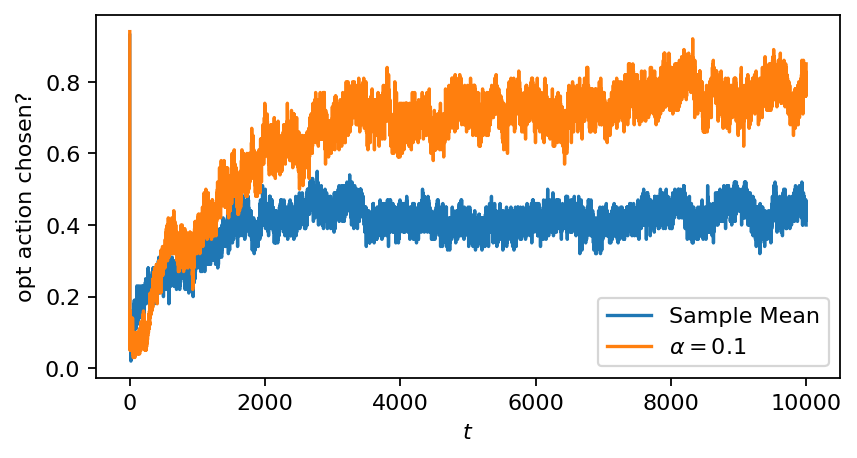

In [169]:
plt.figure(figsize=(6, 3), dpi=160)
plt.plot(sample_average_mean_opt, label="Sample Mean")
plt.plot(step_mean_opt, label=r"$\alpha=0.1$")
plt.xlabel("$t$")
plt.ylabel("opt action chosen?")
plt.legend()
plt.savefig('choices.pdf')